# GRENOBLE TREES: DATA PROCESSING

<span style="color:Orange">

## Imports
</span>

In [117]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
# Paths
"""
raw 
artifacts
reports
"""

'\nraw \nartifacts\nreports\n'

<span style="color:Orange">

## Loading Data
</span>

In [119]:
df = pd.read_csv('../data/raw/arbres_grenoble_epsg4326.csv', sep=',', header = 0, index_col=False,names=None)

In [120]:
df.head()

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
0,5259,ESP11324,AR11324,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175673908288694,5.749421158918044"
1,1478,ESP27796,AR27796,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP175,...,NaN,NaN,Grenoble Alpes Métropole,NaN,NaN,NaN,Métropole de Grenoble,Tige,NaN,"45.175689031385716,5.749449836814956"
2,13139,ESP4323,AR4323,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,"45.175403375194556,5.748482643586666"
3,24132,ESP7132,AR7132,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP1009,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,"45.17542427590123,5.748557574259692"
4,23970,ESP15162,AR15162,VEG,VEGETATION,ESP01,Arbre,ESP174,Arbre d'espaces ouverts,ESP625,...,NaN,NaN,Ville de Grenoble,NaN,Moins de 10 m,NaN,Ville de Grenoble,NaN,NaN,"45.17760812265083,5.749356960358159"


In [121]:
df.tail()

,elem_point_id,code,nom,genre,genre_desc,categorie,categorie_desc,sous_categorie,sous_categorie_desc,code_parent,...,diametrearbre,causeabattage,collectivite,stationmetro,hauteurarbre,portarbre,structure,forme,typenature,geo_point_2d
31731,18164,ESP27355,AR27355,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP915,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,NaN,Semi-libre,"45.16662555881056,5.725420773879907"
31732,18170,ESP27356,AR27356,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP215,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Libre,Métropole de Grenoble,NaN,Libre,"45.166507843931036,5.724994100759832"
31733,18173,ESP27357,AR27357,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP544,...,NaN,NaN,Grenoble Alpes Métropole,NaN,de 10 m à 20 m,Semi-libre,Métropole de Grenoble,NaN,Semi-libre,"45.164310298174165,5.72386645777105"
31734,18179,ESP27358,AR27358,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP917,...,NaN,NaN,Ville de Grenoble,NaN,de 10 m à 20 m,NaN,Ville de Grenoble,NaN,NaN,"45.160543156799626,5.723835565766619"
31735,18182,ESP27359,AR27359,VEG,VEGETATION,ESP01,Arbre,ESP151,Arbre de voirie,ESP1118,...,NaN,NaN,Grenoble Alpes Métropole,NaN,Moins de 10 m,Libre,Métropole de Grenoble,Tige,Libre,"45.16462354239855,5.72746980135806"


In [122]:
print("Number of Rows: {}".format(df.shape[0]))
print("Number of Columns: {}".format(df.shape[1]))

Number of Rows: 31736
Number of Columns: 38


<span style="color:Orange">

## Data Type and Structure
</span>

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31736 entries, 0 to 31735
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   elem_point_id          31736 non-null  int64  
 1   code                   31736 non-null  object 
 2   nom                    31736 non-null  object 
 3   genre                  31736 non-null  object 
 4   genre_desc             31736 non-null  object 
 5   categorie              31736 non-null  object 
 6   categorie_desc         31736 non-null  object 
 7   sous_categorie         31736 non-null  object 
 8   sous_categorie_desc    31736 non-null  object 
 9   code_parent            31736 non-null  object 
 10  code_parent_desc       31736 non-null  object 
 11  adr_secteur            31736 non-null  int64  
 12  bien_reference         31736 non-null  object 
 13  genre_bota             30984 non-null  object 
 14  espece                 29401 non-null  object 
 15  va

In [124]:
print("* Number of unique values for 'object' columns:\n")

for label, column in df.select_dtypes('object').items():
    print('-'*40)
    print(f'Column name: {label}')
    print(f'Number of unique values: {column.nunique()}')
    print(f'Unique values: {column.unique()}')

* Number of unique values for 'object' columns:

----------------------------------------
Column name: code
Number of unique values: 31736
Unique values: ['ESP11324' 'ESP27796' 'ESP4323' ... 'ESP27357' 'ESP27358' 'ESP27359']
----------------------------------------
Column name: nom
Number of unique values: 31736
Unique values: ['AR11324' 'AR27796' 'AR4323' ... 'AR27357' 'AR27358' 'AR27359']
----------------------------------------
Column name: genre
Number of unique values: 1
Unique values: ['VEG']
----------------------------------------
Column name: genre_desc
Number of unique values: 1
Unique values: ['VEGETATION']
----------------------------------------
Column name: categorie
Number of unique values: 1
Unique values: ['ESP01']
----------------------------------------
Column name: categorie_desc
Number of unique values: 1
Unique values: ['Arbre']
----------------------------------------
Column name: sous_categorie
Number of unique values: 4
Unique values: ['ESP151' 'ESP174' 'ESP065

<span style="color:Orange">

## Check if some Columns give the Same Information
</span>

In [125]:
print("* Cross table for selected columns:",
      pd.crosstab(df['genre'], df['genre_desc'], margins=True),
      pd.crosstab(df['categorie'], df['categorie_desc'], margins=True),
      pd.crosstab(df['sous_categorie'], df['sous_categorie_desc'], margins=True),
      pd.crosstab(df['code_parent'], df['code_parent_desc'], margins=True),
      sep='\n'*2)

* Cross table for selected columns:

genre_desc  VEGETATION    All
genre                        
VEG              31736  31736
All              31736  31736

categorie_desc  Arbre    All
categorie                   
ESP01           31736  31736
All             31736  31736

sous_categorie_desc  Arbre d'enceintes fermées  Arbre d'espaces ouverts  \
sous_categorie                                                            
ESP065                                    2390                        0   
ESP151                                       0                        0   
ESP174                                       0                    15283   
ESP187                                       0                        0   
All                                       2390                    15283   

sous_categorie_desc  Arbre de voirie  Bois semi naturel    All  
sous_categorie                                                  
ESP065                             0                  0   2390  
ESP1

<span style="color:Orange">

## Removing Empty and Duplicated Columns
</span>

In [126]:
print("* Removing empty columns:", df.columns[df.isna().all()], sep='\n'*2)
df = df.dropna(how='all').dropna(how='all', axis=1)

* Removing empty columns:

Index(['equipe', 'courrier', 'anneeabattage', 'essouchement', 'diametrearbre',
       'causeabattage'],
      dtype='object')


In [127]:
columns_to_drop = ['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie', 'categorie_desc', 'sous_categorie_desc', 'code_parent_desc', 'bien_reference']

print("* Removing duplicated or useless columns:", columns_to_drop, sep='\n'*2)

df = df.drop(columns=columns_to_drop)

* Removing duplicated or useless columns:

['elem_point_id', 'code', 'nom', 'genre', 'genre_desc', 'categorie', 'categorie_desc', 'sous_categorie_desc', 'code_parent_desc', 'bien_reference']


<span style="color:Orange">

## Processing Tree Geolocation Data
</span>

A geolocation involves two values: longitude and latitude. When using them separately in a regression, we may miss informations. In fact, two trees may have the same latitude but are far when we consider their longitude. To avoid missing informations, we create a single feature that take into account both values.

We keep longitude and latitude in the dataset, and use them to create neigbor trees by using clustering algorithm ([source](https://heartbeat.comet.ml/working-with-geospatial-data-in-machine-learning-ad4097c7228d)). K Neighbors Regression, can also deal with both columns ([source](https://stackoverflow.com/questions/50423489/whats-the-best-way-of-using-gps-coordinate-in-regression-model)).

**Get latitude and longitude**

In [128]:
df[['latitude', 'longitude']] = df['geo_point_2d'].str.split(",", expand = True).apply(pd.to_numeric)
df = df.drop(columns='geo_point_2d')

<Axes: xlabel='longitude', ylabel='latitude'>

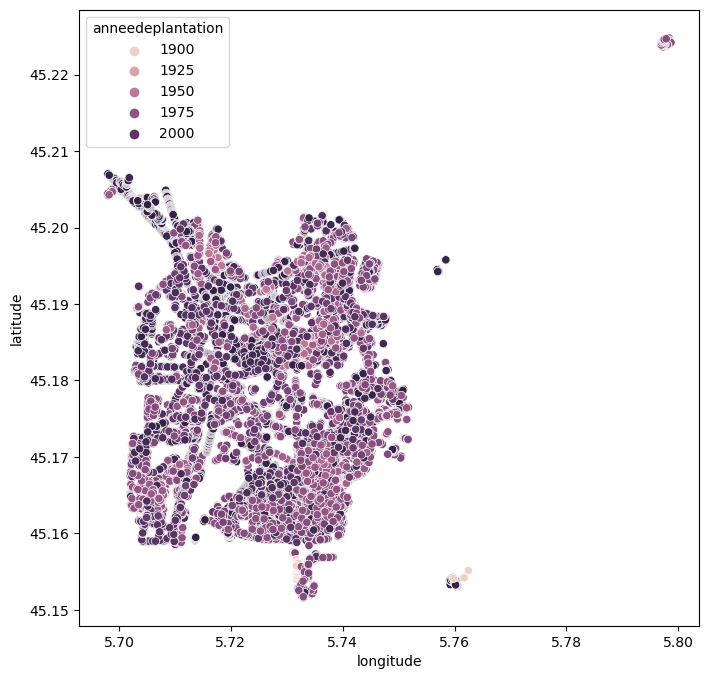

In [129]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(x="longitude", y="latitude", hue="anneedeplantation",
                     data=df, ax=ax)

**Performing Clustering**

In [130]:
from sklearn.cluster import KMeans ,AgglomerativeClustering

# Create 5 clusters using hierarchical clustering.
agc = AgglomerativeClustering(n_clusters =5, metric='euclidean', linkage='ward')
df['location_cluster'] = agc.fit_predict(df[['latitude','longitude']])

In [139]:
# Create 5 clusters using k-means clustering algorithm.
kmeans = KMeans(5, n_init="auto")
clusters = kmeans.fit_predict(df[['latitude','longitude']])
df['location_cluster'] = kmeans.predict(df[['latitude','longitude']])

**Do the clustering better than the feature `sector`**?

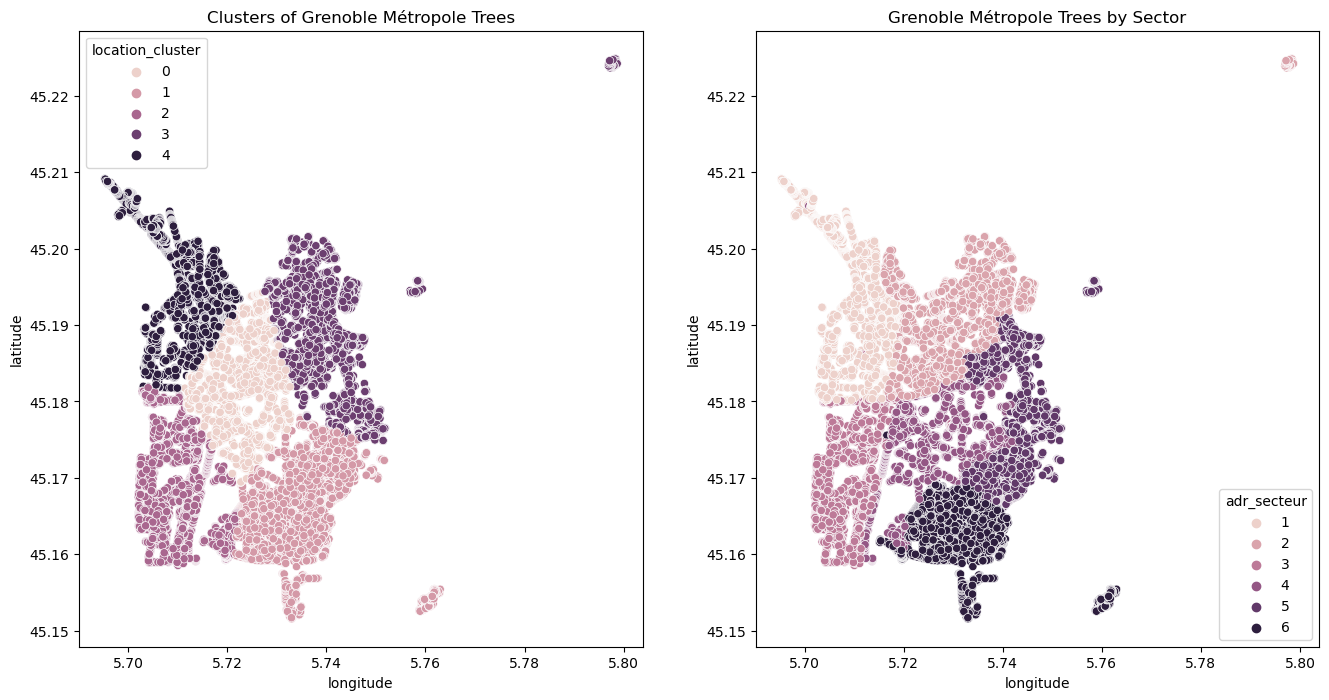

In [140]:
# Plot clusters
fig = plt.figure(figsize=(16,8))

ax1 = fig.add_subplot(1,2,1)
sns.scatterplot(x="longitude", y="latitude", hue="location_cluster",
                     data=df, ax=ax1)
plt.title('Clusters of Grenoble Métropole Trees')

ax2 = fig.add_subplot(1,2,2)
sns.scatterplot(x="longitude", y="latitude", hue="adr_secteur",
                     data=df, ax=ax2)
plt.title('Grenoble Métropole Trees by Sector')

plt.show()

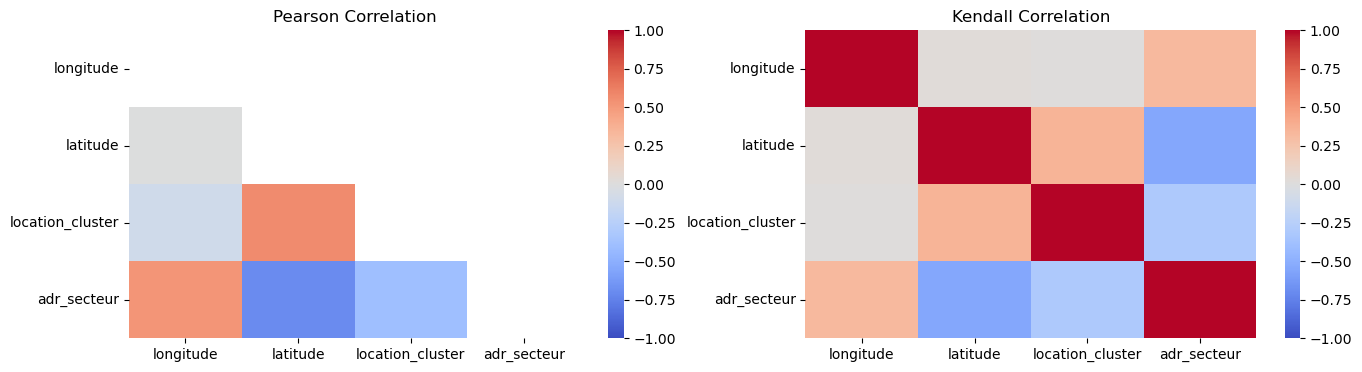

In [147]:
# Correlation
corr = df[['longitude', 'latitude', 'location_cluster', 'adr_secteur']].corr()
matrix = np.triu(corr)

corr_kendall = df[['longitude', 'latitude', 'location_cluster', 'adr_secteur']].corr(method='kendall')

fig = plt.figure(figsize=(16,4))

ax1 = fig.add_subplot(1,2,1)
sns.heatmap(corr, cmap="coolwarm",annot=False, vmin=-1, vmax=1, mask=matrix, ax=ax1)
plt.title('Pearson Correlation')

ax2 = fig.add_subplot(1,2,2)
sns.heatmap(corr_kendall, cmap="coolwarm",annot=False, vmin=-1, vmax=1, ax=ax2)
plt.title('Kendall Correlation')

plt.show()

**Get location**

In [ ]:

# Get location
df['location'] = geocode.reverse((df.latitude, df.longitude))

<span style="color:Orange">

## Missing Values
</span>

<Axes: >

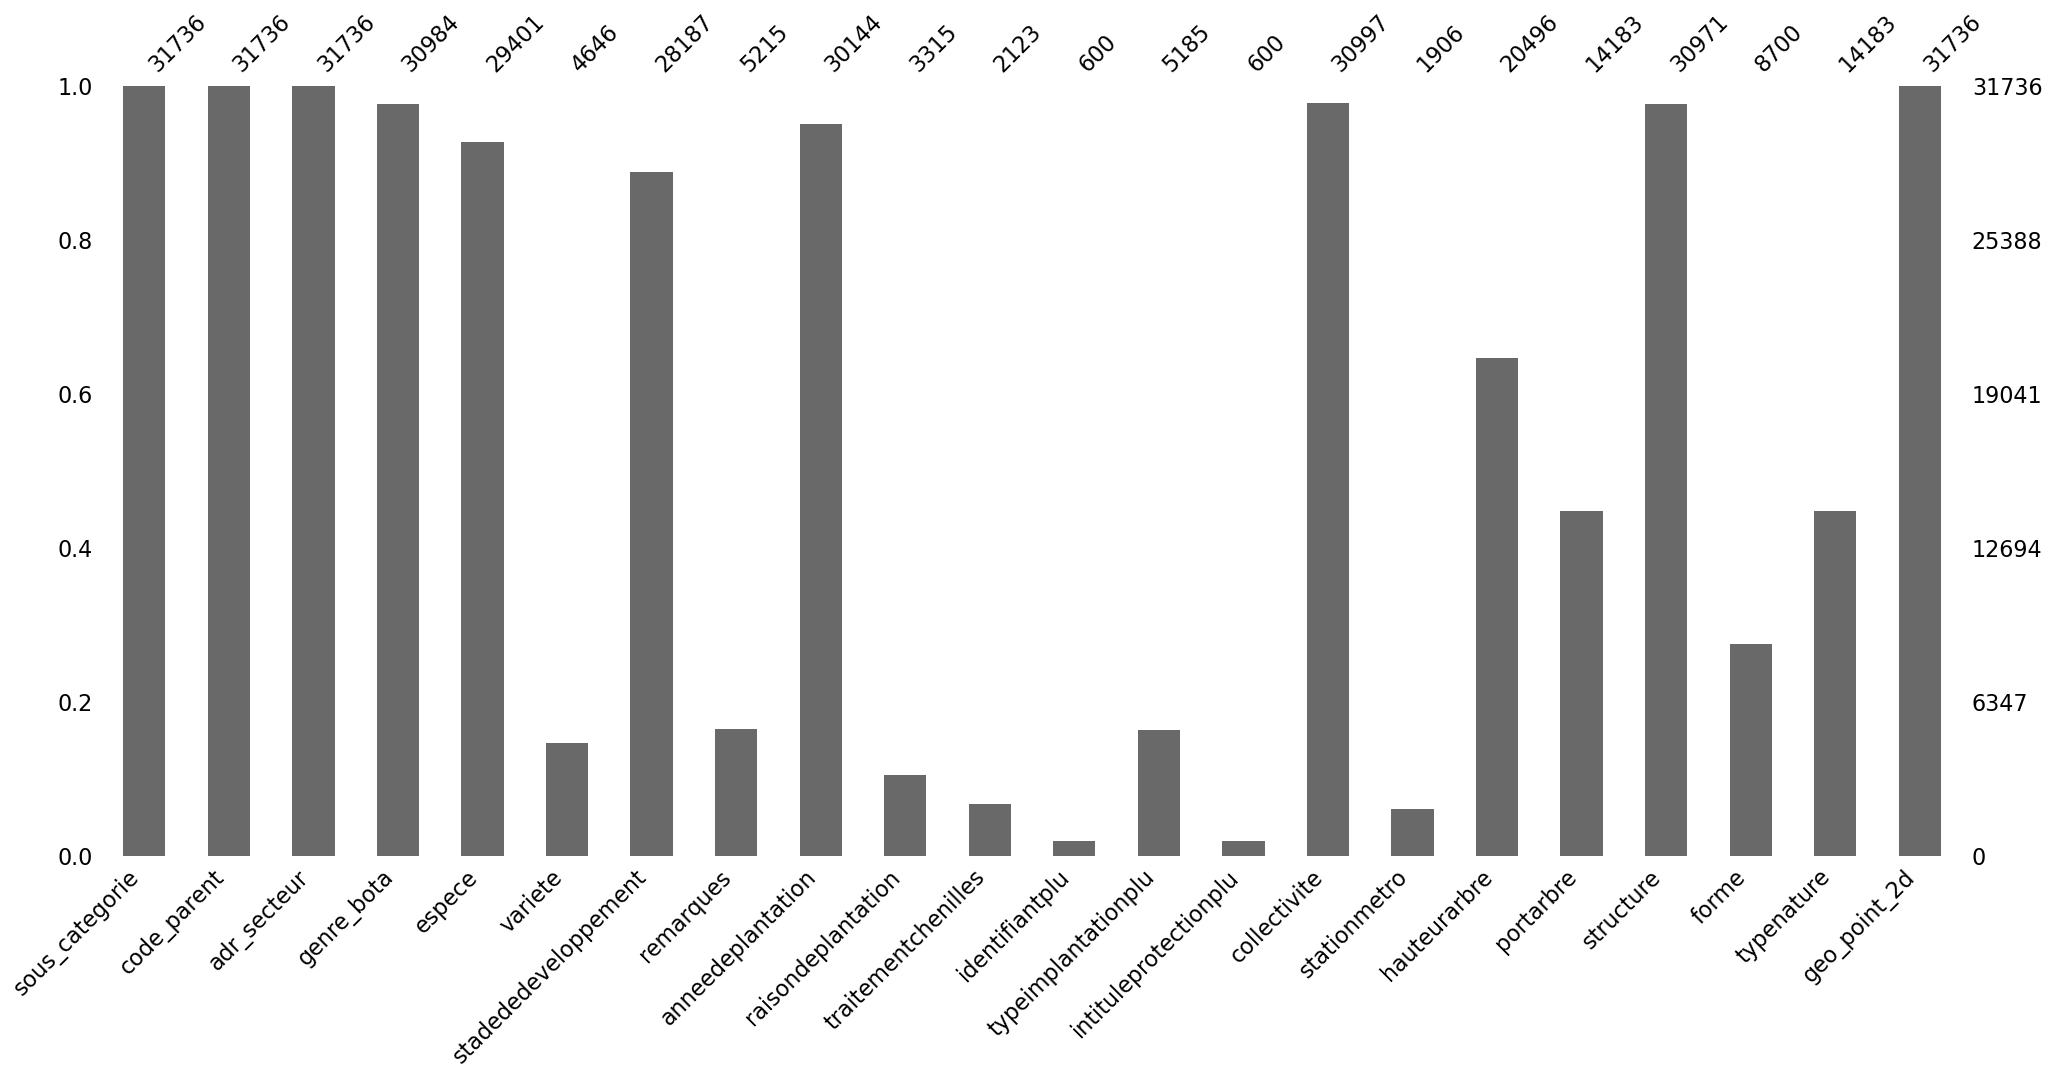

In [54]:
# Visualize the number of missing values as a bar chart
msno.bar(df)

In [55]:
percent_of_na = pd.DataFrame(df.isna().sum())
percent_of_na.columns = ['percent']
percent_of_na.percent = percent_of_na.percent*100/len(df)
columns_with_50percent_missing = percent_of_na[percent_of_na['percent']>50].index.tolist()
if ("anneedeplantation" in columns_with_50percent_missing):
    columns_with_50percent_missing.remove("anneedeplantation")
print("* Columns with a minimum of 50% missing values dropped:", columns_with_50percent_missing, sep='\n'*2)
df = df.drop(columns=columns_with_50percent_missing)

* Columns with a minimum of 50% missing values dropped:

['variete', 'remarques', 'raisondeplantation', 'traitementchenilles', 'identifiantplu', 'typeimplantationplu', 'intituleprotectionplu', 'stationmetro', 'portarbre', 'forme', 'typenature']


<Axes: >

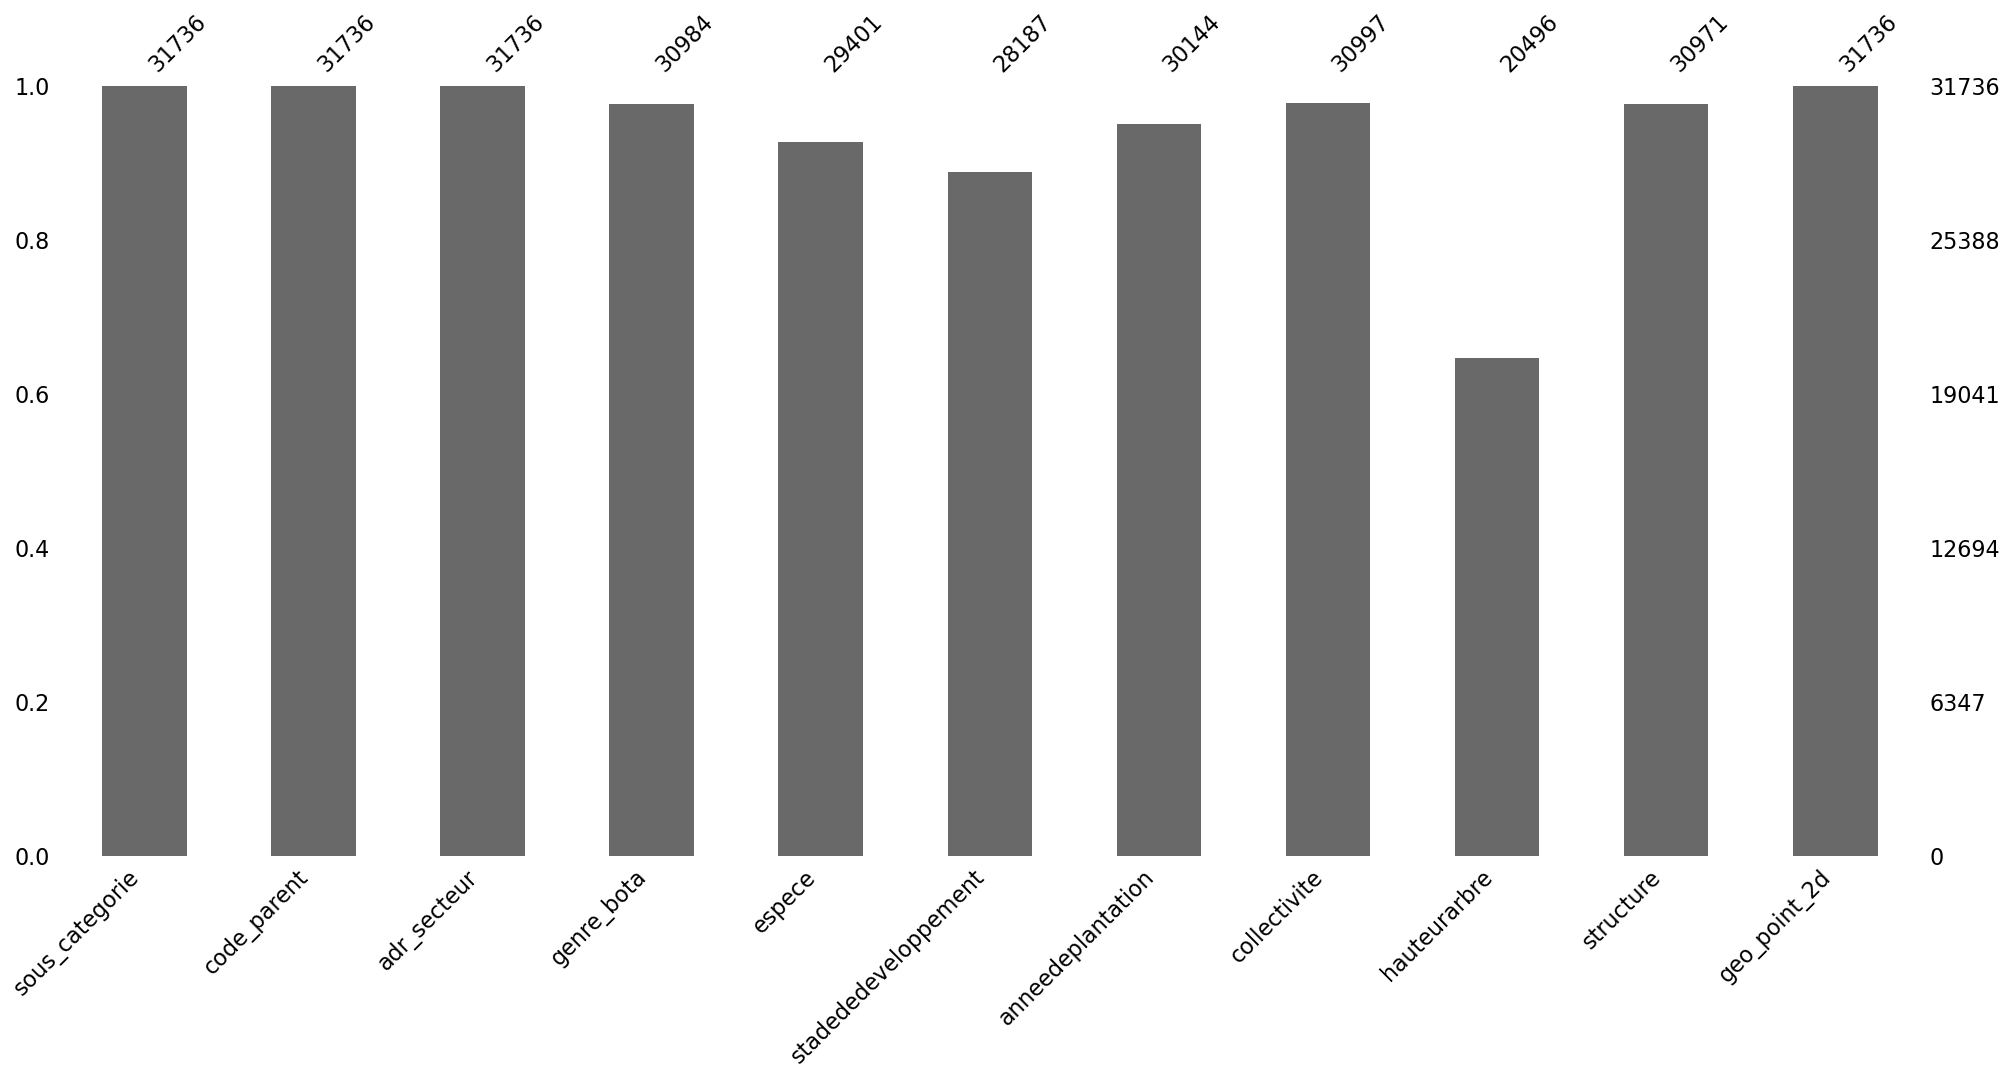

In [56]:
# Visualize the number of missing values as a bar chart
msno.bar(df)

<span style="color:Orange">

## Trees without Year of Plantation
</span>

In [57]:
print("Number of trees without year of plantation =", df['anneedeplantation'].isna().sum())

df_predict = df.loc[df['anneedeplantation'].isna()]

df_model = df.dropna(subset=['anneedeplantation'])

Number of trees without year of plantation = 1592
